<a href="https://colab.research.google.com/github/Andrey22154/sber/blob/main/%D0%A1%D0%B1%D0%B5%D1%80_%D0%B4%D0%B5%D0%BB%D0%BE%D0%B2%D0%B0%D1%8F_%D1%81%D1%80%D0%B5%D0%B4%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/events.csv')

In [3]:
data.head()

,visit_date,URL_visited,user_id,user_reg_date
0,01.02.2018,https://dasreda.ru/learn/courses/yandeksdirekt...,2123,01.02.2018
1,01.02.2018,https://dasreda.ru/learn/courses/odnoklassniki...,2123,01.02.2018
2,01.02.2018,https://dasreda.ru/learn/courses/yandeksauditorii,2123,01.02.2018
3,01.02.2018,https://dasreda.ru/learn/courses/yandeksauditorii,2123,01.02.2018
4,01.02.2018,https://dasreda.ru/learn/courses/yandeksauditorii,2123,01.02.2018


In [4]:
"""
Преобразуем даты в удобный формат
"""
data['visit_date'] = pd.to_datetime(data['visit_date'], format = '%d.%m.%Y')
data['user_reg_date'] = pd.to_datetime(data['user_reg_date'], format = '%d.%m.%Y')

In [5]:
"""
Считаем количество действий пользователя
"""
courses = []
blog = []
video = []
trajectory = []
do = []
category = []
all_cols = [courses, blog, video, trajectory, do, category]
all_cols_vis = ['courses', 'blog', 'video', 'trajectory', 'do', 'category']
for i in range(len(all_cols)):
  for j in range(data.shape[0]):
    if all_cols_vis[i] in data['URL_visited'][j]:
      all_cols[i].append(1)
    else:
      all_cols[i].append(0)

In [6]:
data['courses'] = courses
data['blog'] = blog 
data['video'] = video
data['do'] = do
data['trajectory '] = trajectory 
data['category'] = category

In [7]:
courses = data.groupby('user_id', as_index = False).agg({'courses':'sum'})
blog = data.groupby('user_id', as_index = False).agg({'blog':'sum'})
video = data.groupby('user_id', as_index = False).agg({'video':'sum'})
trajectory = data.groupby('user_id', as_index = False).agg({'trajectory ':'sum'})
do = data.groupby('user_id', as_index = False).agg({'do':'sum'})
category = data.groupby('user_id', as_index = False).agg({'category':'sum'})

In [8]:
data_actions = data.drop(['visit_date',	'URL_visited', 'user_reg_date'], axis = 1).copy()

In [9]:
data_actions = data_actions.groupby('user_id', as_index = False).agg({'courses':'sum', 
                                                                      'blog':'sum',
                                                                      'video':'sum',
                                                                      'trajectory ':'sum',
                                                                      'do':'sum',
                                                                      'category':'sum'}).copy()

In [10]:
"""Данные с количеством посещенных разделов каждого пользователя"""

data_actions

,user_id,courses,blog,video,trajectory,do,category
0,2120,6,1,2,2,0,0
1,2123,43,0,0,0,0,2
2,2124,0,0,0,0,0,0
3,2125,13,3,0,0,1,0
4,2126,3,1,4,0,0,0
...,...,...,...,...,...,...,...
9608,35243,0,0,4,1,1,0
9609,35245,1,1,1,0,0,0
9610,35246,0,1,1,0,0,0
9611,35247,2,2,0,2,0,0


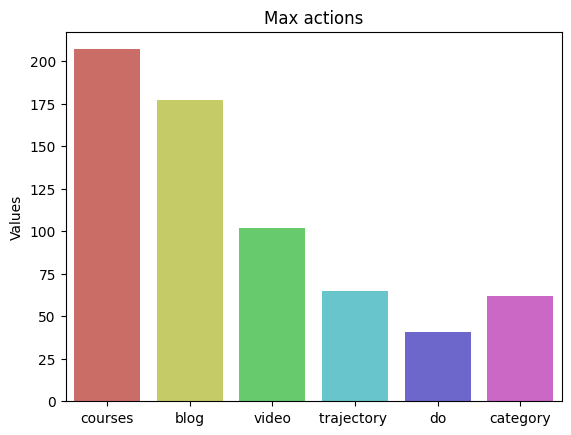

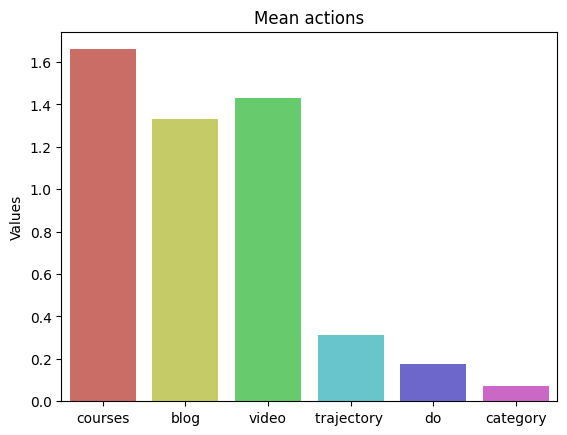

In [11]:
"""
Выводим графики максимальных действий пользователей и средних
"""
data_actions_max = data_actions.max().copy()
data_actions_mean = data_actions.mean().copy()

sp = [data_actions_max, data_actions_mean]
ttle = ['Max actions', 'Mean actions']

for i in range(len(sp)):
  data_act = pd.DataFrame(sp[i]).iloc[1:]
  sns.barplot(data = data_act, x = data_act.index, y = data_act[0], palette = 'hls')
  plt.title(ttle[i])
  plt.ylabel('Values')
  plt.show()

In [12]:
data['week_visit'] = data['visit_date'].dt.week
data = data.set_index('user_id')

<ipython-input-12-84ec8abb4565>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['week_visit'] = data['visit_date'].dt.week


In [13]:
data['Cohort'] = data.groupby(level=0)['visit_date'].min().dt.week
data['first_visit'] = data.groupby(level=0)['visit_date'].min().dt.week
data['last_visit'] = data.groupby(level=0)['visit_date'].max().dt.week
data['count_visit'] = data.groupby(level=0)['visit_date'].count()

<ipython-input-13-2c97ce149969>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['Cohort'] = data.groupby(level=0)['visit_date'].min().dt.week
<ipython-input-13-2c97ce149969>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['first_visit'] = data.groupby(level=0)['visit_date'].min().dt.week
<ipython-input-13-2c97ce149969>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['last_visit'] = data.groupby(level=0)['visit_date'].max().dt.week


In [14]:
data.reset_index(inplace=True)

In [15]:
user = data.groupby(['week_visit', 'user_id']).sum()
user.reset_index(inplace = True)

In [16]:
grouped = data.groupby(['Cohort', 'week_visit']).agg({'user_id': pd.Series.nunique})
grouped.rename(columns = {'user_id': 'all_users'}, inplace=True)
grouped.head()

all_users
Cohort week_visit           
5      5                1134
       6                 339
       7                 203
       8                 149
       9                 126

In [19]:
def period(data):
    data['Period'] = np.arange(len(data)) + 1
    return data

grouped = grouped.groupby(level=0).apply(period)

In [20]:
grouped.reset_index(inplace=True)

In [21]:
grouped.set_index(['Cohort', 'Period'], inplace = True)

In [22]:
cohort_group = grouped['all_users'].groupby(level=0).first()

In [23]:
user = grouped['all_users'].unstack(0).divide(cohort_group, axis=1)
user_abs = grouped['all_users'].unstack(0)
user

Cohort,5,6,7,8,9,10,11,12,13,14
Period,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.298942,0.284091,0.255054,0.255390,0.248276,0.226415,0.235650,0.168354,0.079406,NaN
3,0.179012,0.180871,0.183515,0.187396,0.151724,0.139623,0.135952,0.083544,NaN,NaN
4,0.131393,0.160038,0.139969,0.134328,0.137931,0.120755,0.066465,NaN,NaN,NaN
5,0.111111,0.100379,0.110420,0.119403,0.119540,0.075472,NaN,NaN,NaN,NaN
6,0.085538,0.102273,0.110420,0.081260,0.085057,NaN,NaN,NaN,NaN,NaN
7,0.070547,0.089015,0.101089,0.046434,NaN,NaN,NaN,NaN,NaN,NaN
8,0.075838,0.053030,0.068429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.039683,0.046402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
user_abs

Cohort,5,6,7,8,9,10,11,12,13,14
Period,,,,,,,,,,
1,1134.0,1056.0,643.0,603.0,435.0,265.0,331.0,790.0,2355.0,2001.0
2,339.0,300.0,164.0,154.0,108.0,60.0,78.0,133.0,187.0,NaN
3,203.0,191.0,118.0,113.0,66.0,37.0,45.0,66.0,NaN,NaN
4,149.0,169.0,90.0,81.0,60.0,32.0,22.0,NaN,NaN,NaN
5,126.0,106.0,71.0,72.0,52.0,20.0,NaN,NaN,NaN,NaN
6,97.0,108.0,71.0,49.0,37.0,NaN,NaN,NaN,NaN,NaN
7,80.0,94.0,65.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN
8,86.0,56.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,45.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(133.22222222222223, 0.5, 'Cohort')

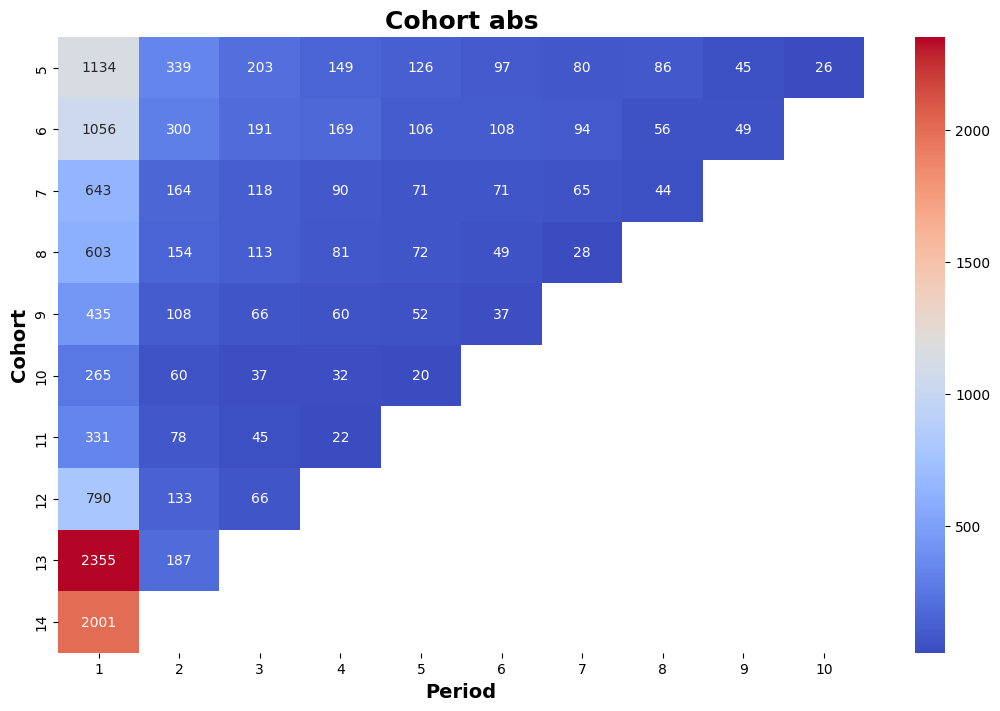

In [25]:
plt.figure(figsize = (13, 8))
sns.heatmap(user_abs.T, annot=True, fmt='g', cmap = 'coolwarm')
plt.title('Cohort abs', fontsize = 18, fontweight='bold')
plt.xlabel('Period', fontsize = 14, fontweight='bold')
plt.ylabel('Cohort', fontsize = 14, fontweight='bold')  

Text(133.22222222222223, 0.5, 'Cohort')

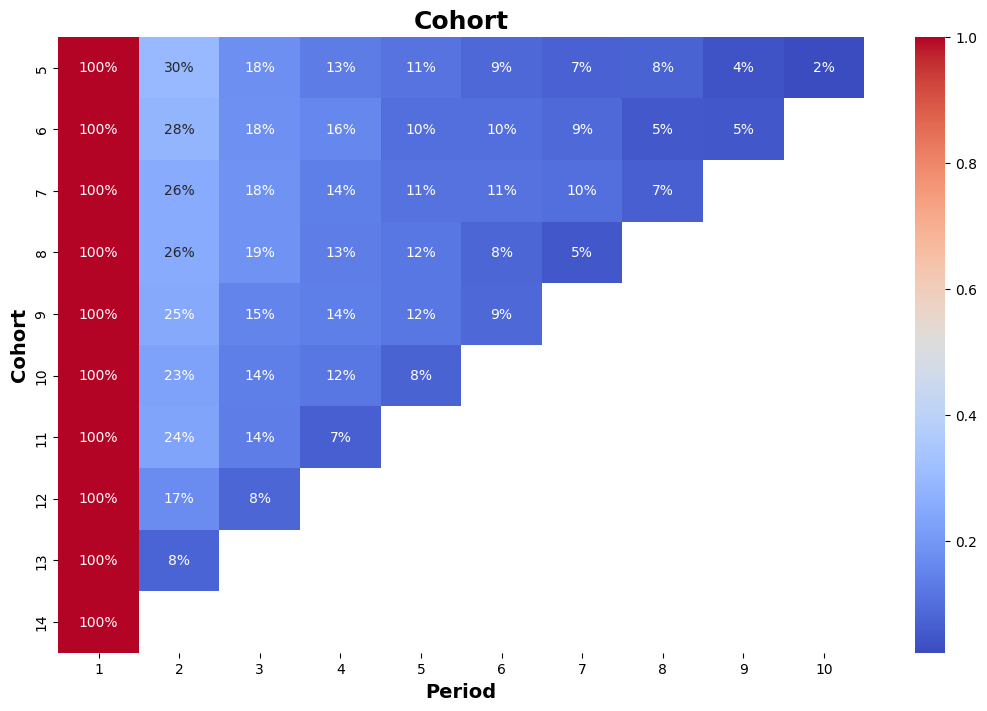

In [26]:
plt.figure(figsize = (13, 8))
sns.heatmap(user.T, annot=True, fmt='0.00%', cmap = 'coolwarm')
plt.title('Cohort', fontsize = 18, fontweight='bold')
plt.xlabel('Period', fontsize = 14, fontweight='bold')
plt.ylabel('Cohort', fontsize = 14, fontweight='bold') 